# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** I Gusti Bagus Ramadha Saverian Ranuh
- **Email:** B244010E@devacademy.id
- **ID Dicoding:** B244010E

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memiliki tingkat pembelian berulang tertinggi, dan bagaimana kita dapat meningkatkan pembelian yang berulang sebesar 20% dalam 6 bulan ke depan?
- Apa saja faktor utama yang mendorong kepuasan pelanggan (diukur berdasarkan skor ulasan), dan bagaimana kita dapat meningkatkannya pada kuartal berikutnya?

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip list

Package               Version    
--------------------- -----------
altair                5.0.1      
attrs                 24.2.0     
Babel                 2.14.0     
backcall              0.2.0      
backports.zoneinfo    0.2.1      
blinker               1.6.3      
branca                0.8.0      
cachetools            5.5.0      
certifi               2024.8.30  
charset-normalizer    3.4.0      
click                 8.1.7      
click-plugins         1.1.1      
cligj                 0.7.2      
colorama              0.4.6      
cycler                0.11.0     
debugpy               1.7.0      
decorator             5.1.1      
entrypoints           0.4        
fiona                 1.9.6      
folium                0.16.0     
fonttools             4.38.0     
geopandas             0.10.2     
gitdb                 4.0.11     
GitPython             3.1.43     
idna                  3.10       
importlib-metadata    6.7.0      
importlib-resources   5.12.0     
ipykernel     

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # Display semua kolom

> Import Package & Library
- pandas dan numpy untuk manipulasi data dan kalkulasi numerik.
- matplotlib dan seaborn untuk membuat berbagai jenis visualisasi.
- `pd.set_option` untuk display semua columns agar bisa melihat & validasi data pada setiap kolom


## Data Wrangling

### Gathering Data

In [4]:
orders_df = pd.read_csv('data/orders_dataset.csv', delimiter=',')
order_items_df = pd.read_csv('data/order_items_dataset.csv', delimiter=',')
order_payments_df = pd.read_csv('data/order_payments_dataset.csv', delimiter=',')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv', delimiter=',')
customer_df = pd.read_csv('data/customers_dataset.csv', delimiter=',')
products_df = pd.read_csv('data/products_dataset.csv', delimiter=',')
product_categories_name_translation_df = pd.read_csv('data/product_category_name_translation.csv', delimiter=',')
sellers_df = pd.read_csv('data/sellers_dataset.csv', delimiter=',')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv', delimiter=',')

> Membaca Dataset E-Commerce menggunakan Pandas 
- Kode di atas digunakan untuk membaca beberapa file CSV yang berisi dataset e-commerce dan menyimpannya ke dalam DataFrame pandas.

In [5]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
product_categories_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [13]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [14]:
geolocation_df.head()


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


> Menampilkan Data Awal dari Setiap Dataset
- Kode berikut digunakan untuk menampilkan lima baris pertama dari setiap DataFrame yang telah dibaca:

1. orders_df.head()
2. order_items_df.head()
3. order_payments_df.head()
4. order_reviews_df.head()
5. customer_df.head()
6. products_df.head()
7. sellers_df.head()
8. geolocation_df.head()

In [15]:
products_df.shape, sellers_df.shape, order_items_df.shape, order_payments_df.shape, order_reviews_df.shape, customer_df.shape, orders_df.shape, geolocation_df.shape

((32951, 9),
 (3095, 4),
 (112650, 7),
 (103886, 5),
 (99224, 7),
 (99441, 5),
 (99441, 8),
 (1000163, 5))

> Melihat shape dari setiap dataset
- Kalau dilihat dari size, geolocation memiliki size yang lebih besar dari dataset yang lain (rata-rata memiliki shape row sebanyak 90000-100000).
- Karena untuk menjawab kedua pertanyaan bisnis tidak memerlukan data geolocation, saya tidak akan melakukan merging geolocation dalam merge_df.

In [16]:
merge_df = pd.merge(left=orders_df, right=order_items_df, how='inner', on="order_id")
merge_df = merge_df.merge(order_payments_df , how='inner', on='order_id')
merge_df = merge_df.merge(order_reviews_df, how='inner', on='order_id')
merge_df = merge_df.merge(customer_df, how='inner', on='customer_id')
merge_df = merge_df.merge(products_df, how='inner', on='product_id')
merge_df = merge_df.merge(product_categories_name_translation_df, how='inner', on='product_category_name')
merge_df = merge_df.merge(sellers_df, how='inner', on='seller_id')
#merge_df = merge_df.merge(geolocation_df, how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
len(merge_df)

115609

In [17]:
merge_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350,maua,SP


In [18]:
merge_df.shape

(115609, 40)

> Menggabungkan Dataset E-Commerce
- Kode berikut digunakan untuk menggabungkan beberapa DataFrame yang berisi dataset e-commerce menjadi satu DataFrame
- `len(merge_df)` untuk menghitung jumlah baris dalam dataframe
- `merge_df.head()` untuk menghitung sampel data dari dataframe
- `merge_df.shape` melihat size dari baris & kolom pada merge_df. Kalau kita merge geolocation_df juga, size baris menyentuh angka jutaan.

### Assessing Data

In [19]:
# Missing values
merge_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
customer_unique_id                    0


- `merge_df.isnull().sum()` untuk mengecek missing values.

In [20]:
# Duplicate Values
print(merge_df.duplicated().sum())

0


`merge_df.duplicated().sum()` untuk mengecek duplicate values.

In [21]:
merge_df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,1.194535,120.619850,20.056880,1.093747,2.946233,172.387379,4.034409,35061.537597,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,24515.713958
std,0.685926,182.653476,15.836184,0.729849,2.781087,265.873969,1.385584,29841.671732,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,27636.640968
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.870000,4.000000,11310.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.050000,5.000000,24241.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000
75%,1.000000,134.900000,21.210000,1.000000,4.000000,189.480000,5.000000,58745.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28605.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000


> Pengecekan data outlier dengan `describe()`
- Describe disini untuk melihat apakah ada potensi outlier dari setiap data kolom. Kalau kita lihat pada delivery_time_days, ada potensi outlier -> data 75% memiliki value 15, sedangkan data maximumnya berada di value 208 menunjukkan ketidakseimbangan dan perbedaan yang signifikan dengan data kuartil tengah

### Cleaning Data

In [22]:
# Isi missing value 'order_approved_at' dengan 'order_purchase_timestamp'
merge_df['order_approved_at'].fillna(merge_df['order_purchase_timestamp'], inplace=True)

data `order_approved_at` memiliki missing value sebanyak 15. Oleh karena itu, karena ada kemiripan timestamp antara order_approved dengan order_purchase, kita asumsikan bahwa ada kemiripan yang besar antara kedua kolom. Oleh karena itu, kita bisa menggantikan missing value `order_approved_at` dengan `order_purchase_timestamp` tanpa kehilangan informasi penting terkait tanggal pembelian

In [23]:
# Isi missing value delivery dates dengan estimated delivery dates
merge_df['order_delivered_carrier_date'].fillna(merge_df['order_estimated_delivery_date'], inplace=True)
merge_df['order_delivered_customer_date'].fillna(merge_df['order_estimated_delivery_date'], inplace=True)

Sama juga dengan kasus sebelumnya, Menggunakan `order_estimated_delivery_date` sebagai pengganti missing values membantu menjaga konsistensi data dan memungkinkan analisis lebih lanjut tanpa kehilangan informasi penting terkait tanggal pengiriman.

In [24]:
merge_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
customer_unique_id                    0


> Membiarkan Kolom review comment dan Fisik Produk

Kolom ini berisi informasi tentang review pelanggan dan juga ciri-ciri fisik dari produk seperti lebar, tinggi, berat, dan panjangnya. Data tersebut tidak relevan dengan pertanyaan bisnis yang mau dijawab, sehingga missing value pada kolom tersebut dapat diabaikan

## Exploratory Data Analysis (EDA)

### Explore ...

array([[<AxesSubplot:title={'center':'order_item_id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'freight_value'}>,
        <AxesSubplot:title={'center':'payment_sequential'}>],
       [<AxesSubplot:title={'center':'payment_installments'}>,
        <AxesSubplot:title={'center':'payment_value'}>,
        <AxesSubplot:title={'center':'review_score'}>,
        <AxesSubplot:title={'center':'customer_zip_code_prefix'}>],
       [<AxesSubplot:title={'center':'product_name_lenght'}>,
        <AxesSubplot:title={'center':'product_description_lenght'}>,
        <AxesSubplot:title={'center':'product_photos_qty'}>,
        <AxesSubplot:title={'center':'product_weight_g'}>],
       [<AxesSubplot:title={'center':'product_length_cm'}>,
        <AxesSubplot:title={'center':'product_height_cm'}>,
        <AxesSubplot:title={'center':'product_width_cm'}>,
        <AxesSubplot:title={'center':'seller_zip_code_prefix'}>]],
      dtype=object)

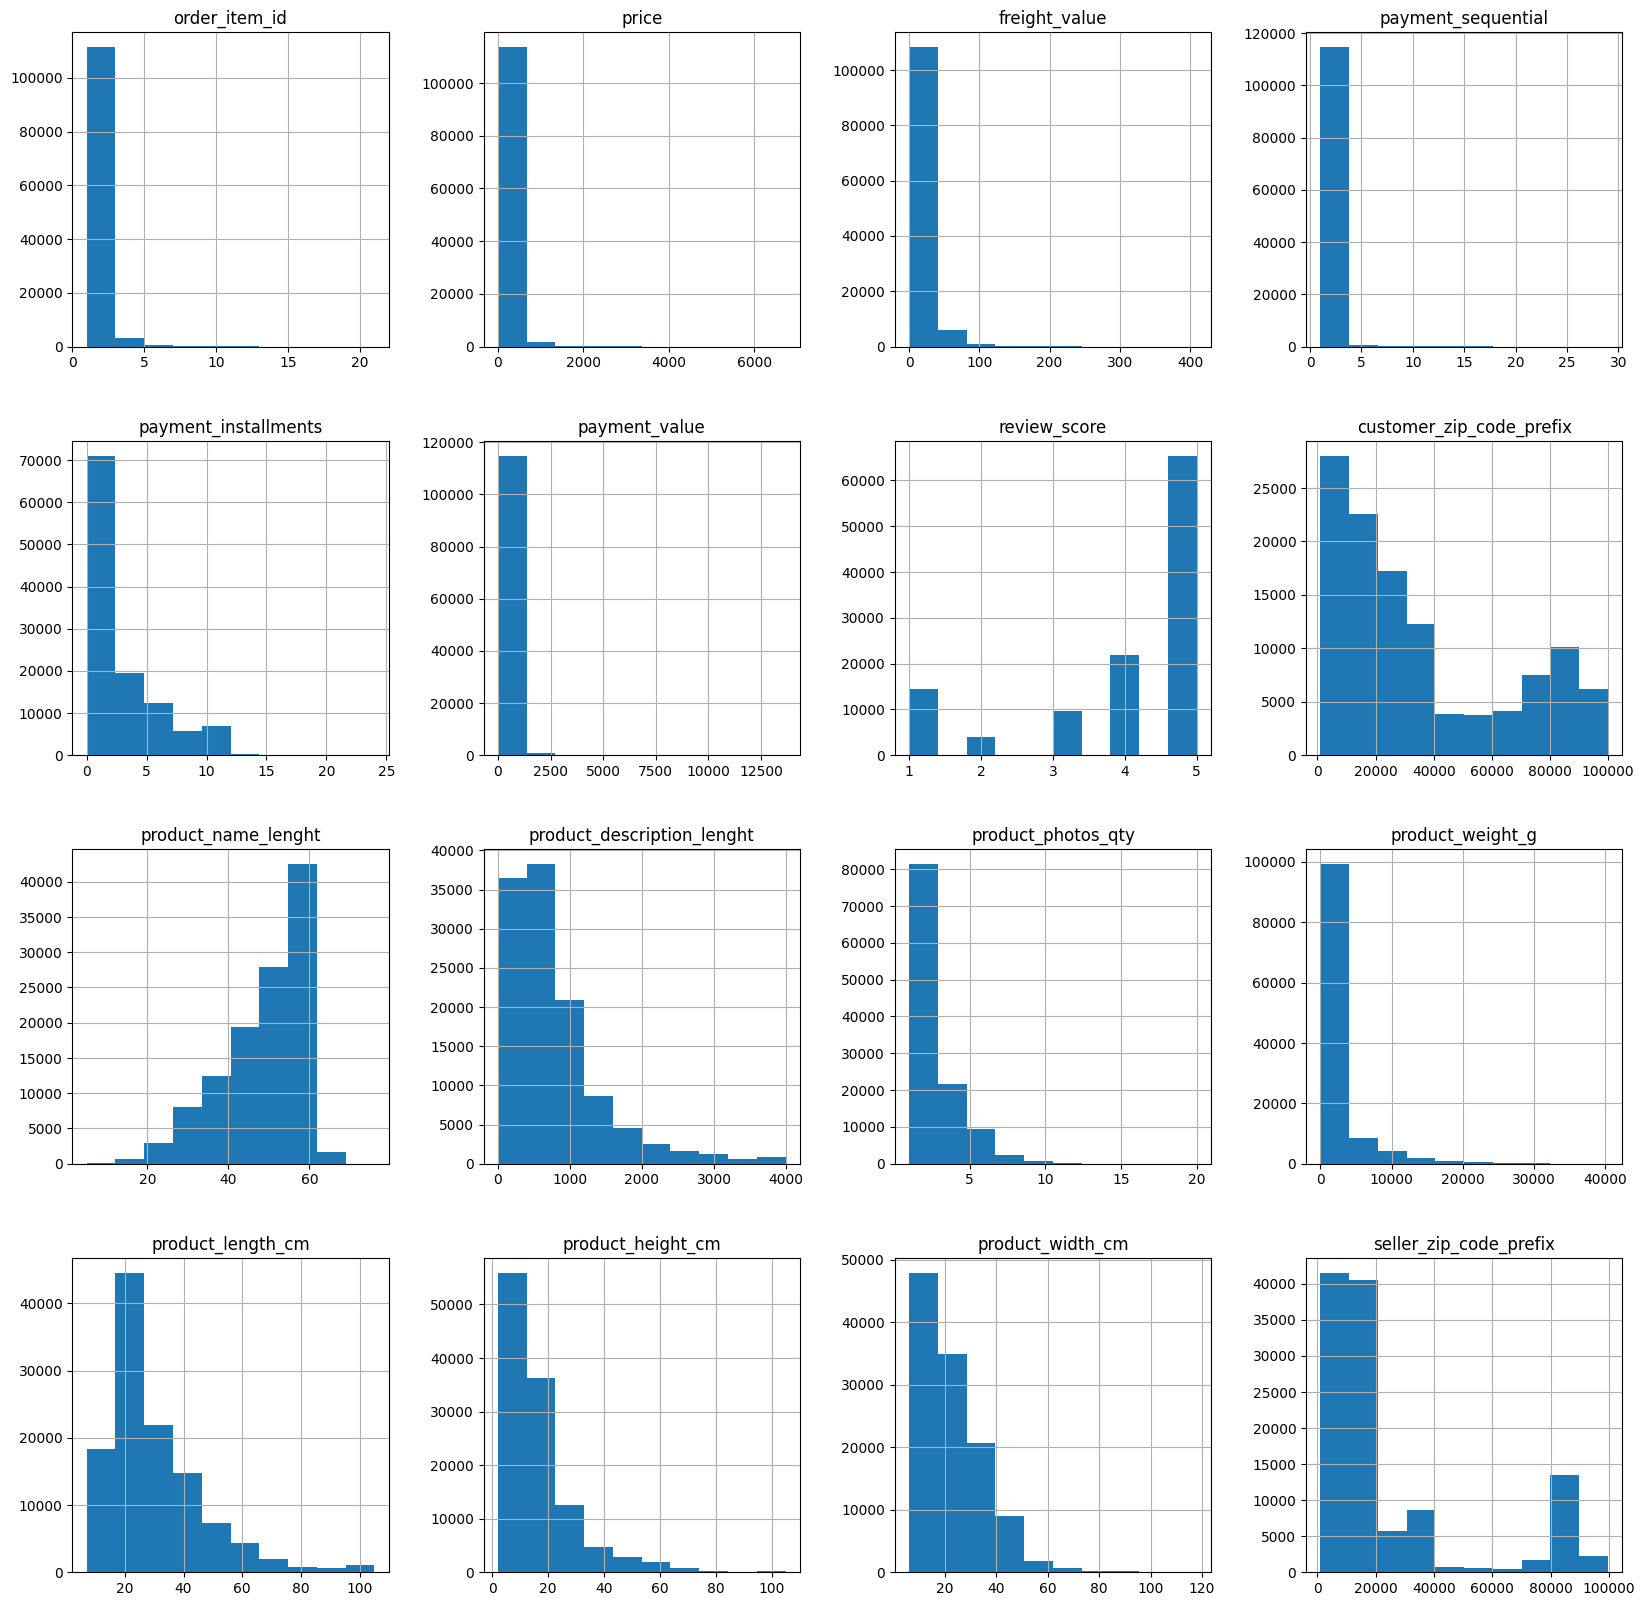

In [25]:
merge_df.hist(figsize=(20, 20))

> Insight Histogram
- Pada bagian review_score, distribusi lebih condong miring ke kanan karena kebanyakan user melakukan review bintang 5. Namun, kita melihat ada data review_score 1 yang masih menyentuh angka signifikan sekitar 15000 data. 

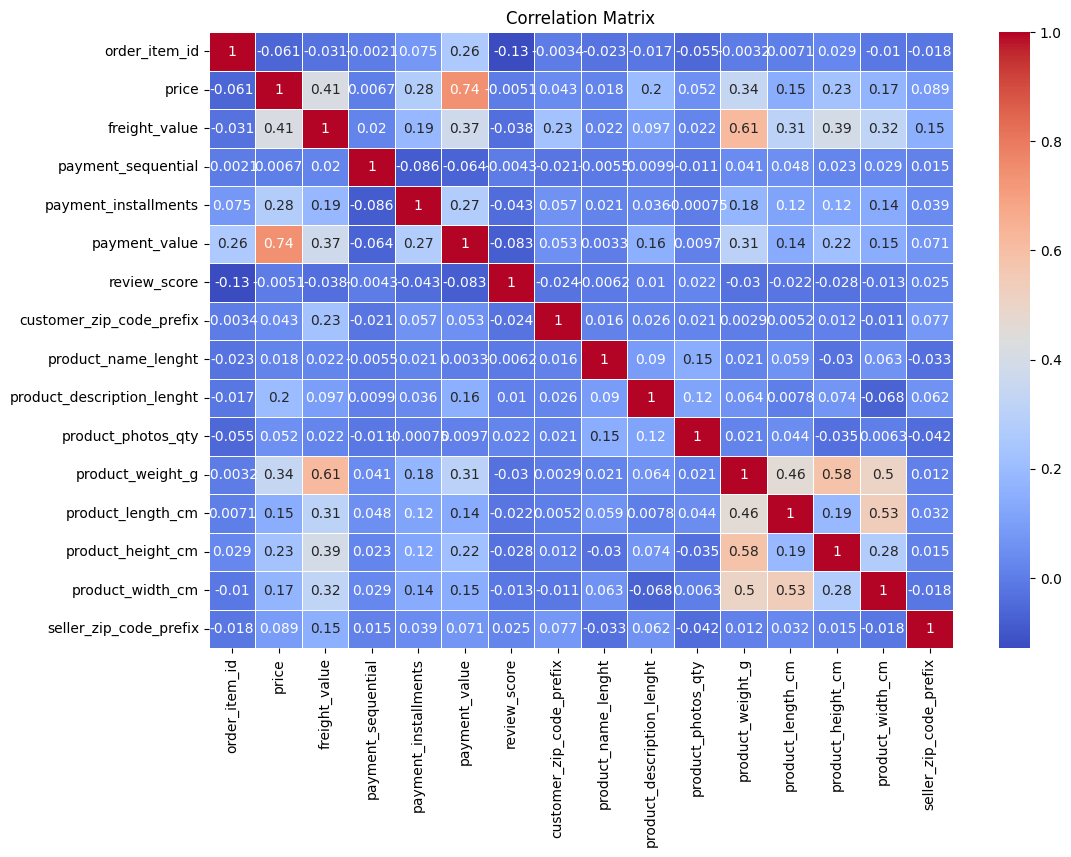

In [26]:
plt.figure(figsize=(12, 8))
correlation_matrix = merge_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- Melakukan histogram untuk identifikasi korelasi antar kolom

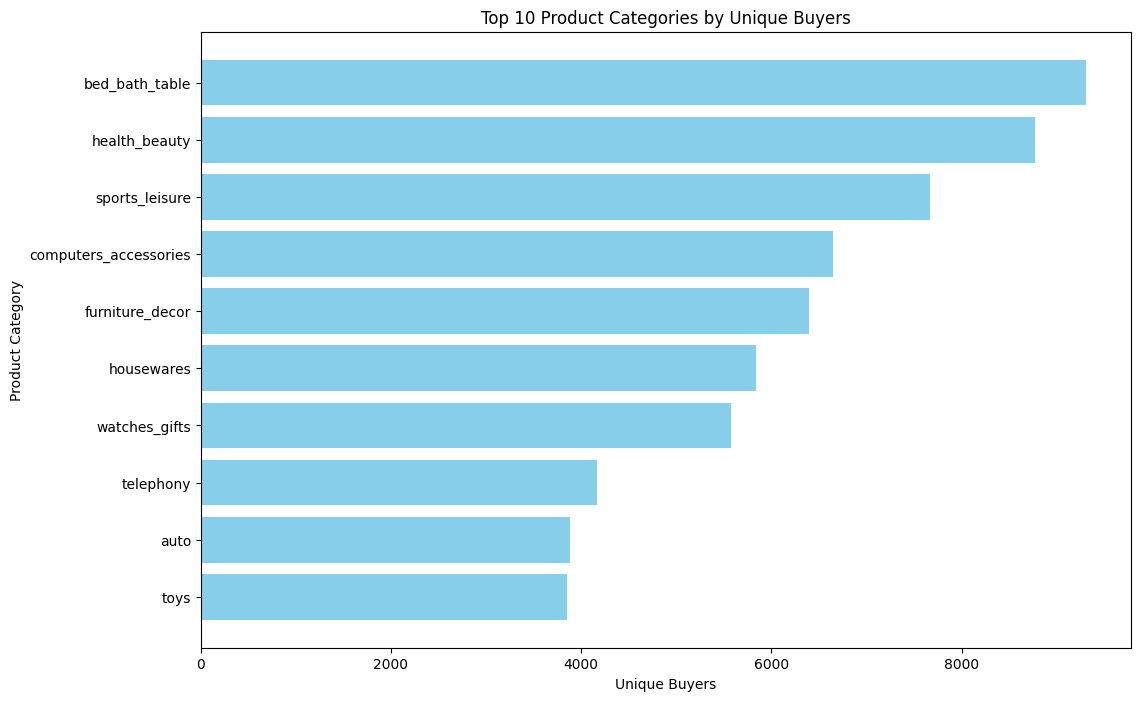

In [27]:
# Menghitung produk dengan tingkat buyer tertinggi
product_buyer_count = merge_df.groupby('product_category_name_english')['customer_id'].nunique().reset_index()
product_buyer_count.columns = ['Product Category', 'Unique Buyers']
product_buyer_count = product_buyer_count.sort_values(by='Unique Buyers', ascending=False)
#print(product_buyer_count)

# Plot produk dengan tingkat buyer tertinggi
top_10_product_buyer_count = product_buyer_count.head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_product_buyer_count['Product Category'], top_10_product_buyer_count['Unique Buyers'], color='skyblue')
plt.xlabel('Unique Buyers')
plt.ylabel('Product Category')
plt.title('Top 10 Product Categories by Unique Buyers')
plt.gca().invert_yaxis()  # Invert y-axis agar value tertinggi berada diatas
plt.show()



> Insight melihat produk yang memiliki customer unik paling banyak
- Data menunjukkan bahwa kategori produk 'cama_mesa_banho' (tempat tidur, meja, dan furnitur kamar mandi?)  memiliki jumlah pembeli unik tertinggi (9313), diikuti oleh 'beleza_saude' (produk kecantikan dan kesehatan) (8770) dan 'esporte_lazer' (peralatan olahraga dan rekreasi) (7669). Kategori-kategori ini adalah yang paling populer di antara para pelanggan. Di sisi lain, kategori seperti 'seguros_e_servicos' (asuransi dam layanan) memiliki jumlah pembeli unik yang sangat sedikit (2), yang mengindikasikan minat pelanggan yang lebih rendah terhadap produk tersebut.


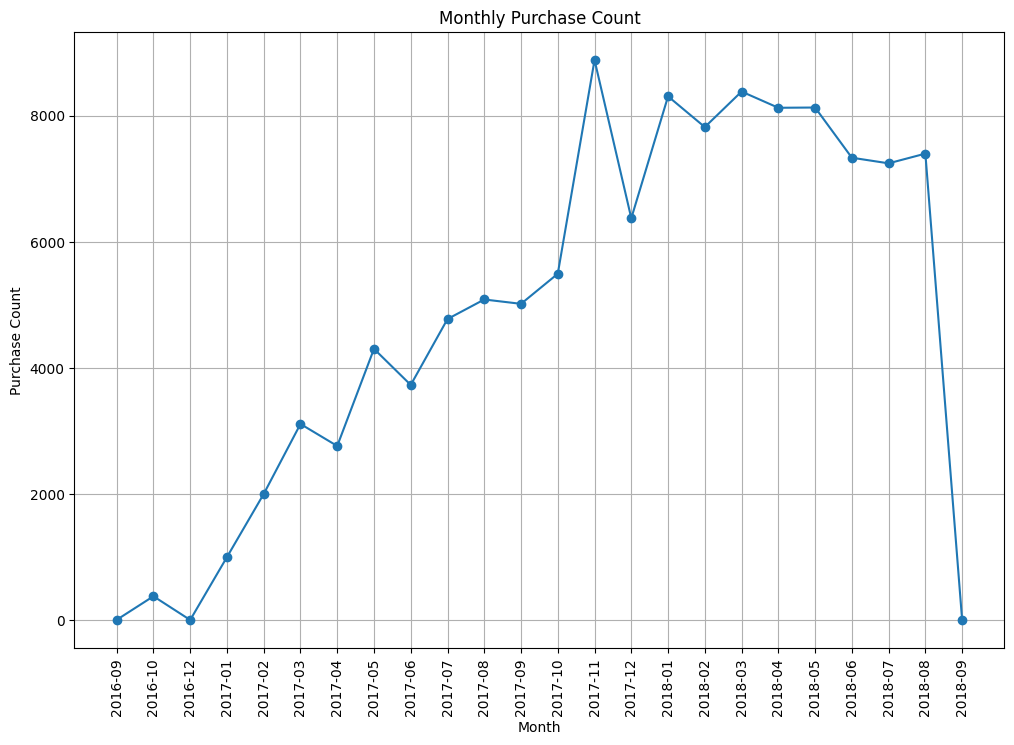

In [28]:
# Menghitung tingkat pembelian berdasarkan bulan
merge_df['order_purchase_timestamp'] = pd.to_datetime(merge_df['order_purchase_timestamp'])
merge_df['purchase_month'] = merge_df['order_purchase_timestamp'].dt.to_period('M')
monthly_purchase_count = merge_df.groupby('purchase_month')['order_id'].count().reset_index()
monthly_purchase_count.columns = ['Month', 'Purchase Count']
#print(monthly_purchase_count)

# Plot tingkat pembelian berdasarkan bulan
plt.figure(figsize=(12, 8))
plt.plot(monthly_purchase_count['Month'].astype(str), monthly_purchase_count['Purchase Count'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Purchase Count')
plt.title('Monthly Purchase Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

> Insight pembelian / bulan
- Pembelian atau purchasing tertinggi ada di bulan oktober - november dengan peak di 8000+ purchase, lalu pembelian pada oktober 2017 - Agustus 2018 memiliki rata-rata lebih tinggi dari tahun sebelumnya

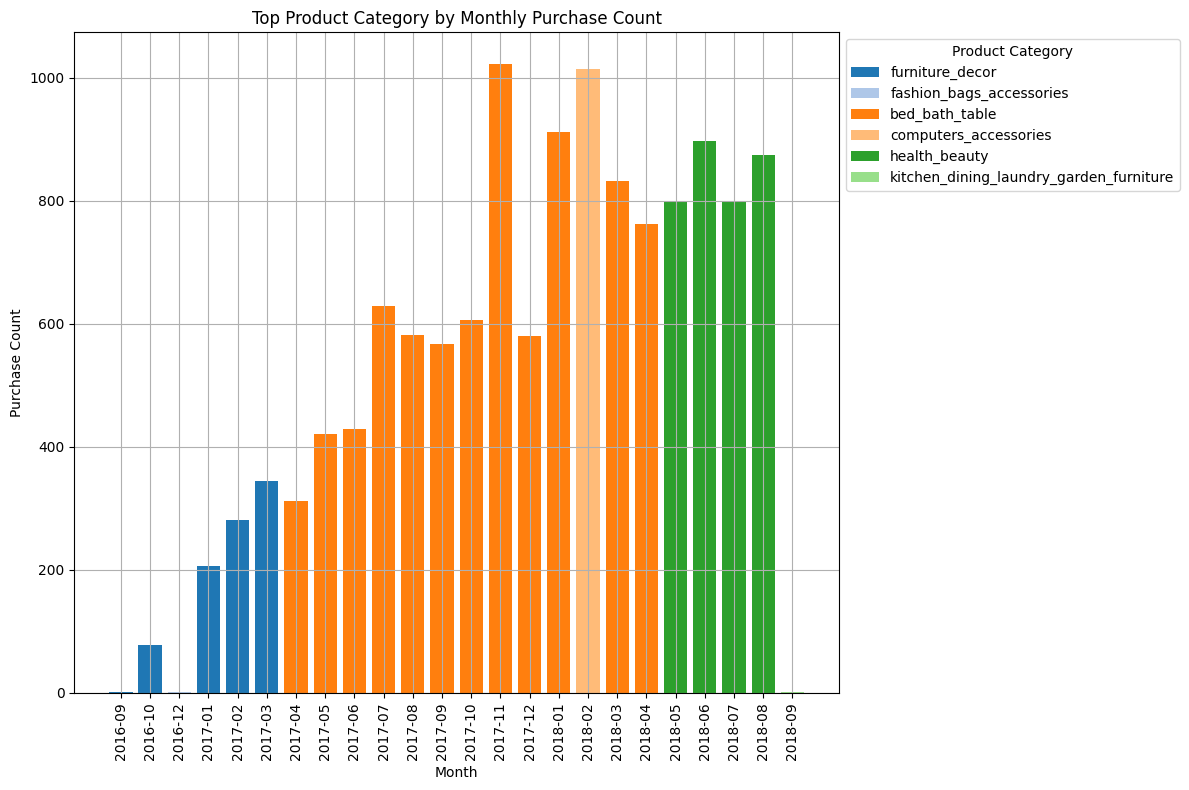

In [29]:
merge_df['order_purchase_timestamp'] = pd.to_datetime(merge_df['order_purchase_timestamp'])
merge_df['purchase_month'] = merge_df['order_purchase_timestamp'].dt.to_period('M')
monthly_product_purchase_count = merge_df.groupby(['purchase_month', 'product_category_name_english'])['order_id'].count().reset_index()
monthly_product_purchase_count.columns = ['Month', 'Product Category', 'Purchase Count']

# Top produk / bulan
top_product_each_month = monthly_product_purchase_count.loc[
    monthly_product_purchase_count.groupby('Month')['Purchase Count'].idxmax()
].reset_index(drop=True)
#print(top_product_each_month)

# Produk unik
unique_categories = top_product_each_month['Product Category'].unique() 


plt.figure(figsize=(12, 8))

# Plot top produk / bulan
for _, row in top_product_each_month.iterrows():
    color_index = list(unique_categories).index(row['Product Category'])
    plt.bar(
        str(row['Month']),
        row['Purchase Count'],
        color=plt.cm.tab20.colors[color_index],
        label=row['Product Category']
    )

plt.xlabel('Month')
plt.ylabel('Purchase Count')
plt.title('Top Product Category by Monthly Purchase Count')
plt.xticks(rotation=90)

# Display produk unik di legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Product Category', bbox_to_anchor=(1, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

> Data Top Product Purchase per Bulan
- Data menunjukkan pergeseran dalam kategori produk teratas dari waktu ke waktu:
1. September 2016 hingga Maret 2017: furnitur_decor adalah kategori teratas.
2. April 2017 hingga April 2018: bed_bath_table menjadi kategori teratas, dengan puncaknya pada bulan November 2017 (1023 pembelian) dan Januari 2018 (912 pembelian), mungkin karena musim liburan.
3. Februari 2018: computer_accessories sempat menduduki peringkat teratas.
4. Mei 2018 hingga Agustus 2018: fashion_bags_accessories (kecantikan dan kesehatan) muncul sebagai kategori utama.
- Hal ini menunjukkan perubahan dalam tren pembelian pelanggan, yang mungkin dipengaruhi oleh faktor musiman, promosi, atau pergeseran minat konsumen

**Insight:**
- Pergeseran tren kategori produk teratas menggarisbawahi pentingnya analisis data historis untuk memprediksi pola permintaan di masa depan. Dengan memahami tren ini, perusahaan bisa mengantisipasi perubahan kebutuhan konsumen, memperkirakan stok yang tepat, dan menyusun strategi kampanye yang lebih efektif.
- Pergeseran kategori produk teratas dari "moveis_decoracao" (furnitur dan dekorasi) ke "cama_mesa_banho," lalu ke "informatica_acessorios" (aksesoris komputer), dan akhirnya ke "beleza_saude" (kecantikan dan kesehatan) menunjukkan bahwa minat konsumen terus berubah dari waktu ke waktu. Hal ini mungkin disebabkan oleh perubahan kebutuhan atau tren pasar, yang bisa menjadi panduan bagi perusahaan untuk merencanakan stok dan promosi sesuai kategori populer di tiap periode.

### Pertanyaan 1: Kategori produk apa yang memiliki tingkat pembelian berulang tertinggi, dan bagaimana kita dapat meningkatkan pembelian berulang sebesar 20% dalam 6 bulan ke depan?

In [30]:
repeat_purchases = merge_df.groupby(['customer_id', 'product_category_name_english']).size().reset_index(name='purchase_count') # Menghitung jumlah pembelian tiap customer
repeat_purchases = repeat_purchases[repeat_purchases['purchase_count'] > 1] # Filter customer dengan pembelian lebih dari 1
repeat_purchases.sort_values(by='purchase_count', ascending=False) # Sort berdasarkan jumlah pembelian

,customer_id,product_category_name_english,purchase_count
14921,270c23a11d024a44c896d1894b261a83,bed_bath_table,42
7442,13aa59158da63ba0e93ec6ac2c07aacb,office_furniture,38
58893,9af2372a1e49340278e7c1ef8d749f34,garden_tools,29
55724,92cd3ec6e2d643d4ebd0e3d6238f69e2,bed_bath_table,26
16659,2ba91e12e5e4c9f56b82b86d9031d329,perfumery,24
...,...,...,...
36668,60b8cd2121a9f39630be3a3a123d27fd,housewares,2
36684,60c23b4f05e926f24472f5ae2ec6b89c,bed_bath_table,2
36699,60ca9940a37e53472bb518dd85c53e3e,bed_bath_table,2
36711,60d3d696d3ad1aa3bc4e6727abea6824,garden_tools,2


> Mengidentifikasi repeat purchase yang di group berdasarkan `customer_id` dan `product_category_name`
- Menganalisis potensi produk yang paling diminati banyak customer berdasarkan repeat purchase. Repeat purchase ini menandakan adanya kepuasan customer dengan produk tersebut, dan bisa memberikan insight bisnis yang penting untuk meningkatkan potensi repeat purchase pada produk.


In [31]:
repeat_purchase_rate = repeat_purchases.groupby('product_category_name_english')['customer_id'].nunique().reset_index() # Menghitung jumlah customer yang melakukan repeat purchase
repeat_purchase_rate

,product_category_name_english,customer_id
0,agro_industry_and_commerce,22
1,air_conditioning,37
2,art,11
3,arts_and_craftmanship,1
4,audio,26
...,...,...
64,stationery,231
65,tablets_printing_image,7
66,telephony,385
67,toys,291


> Menganalisis jumlah customer yang melakukan repeat purchase / kategori produk

In [32]:
total_customers = merge_df.groupby('product_category_name_english')['customer_id'].nunique().reset_index() # Menghitung total customer per kategori produk 
total_customers


,product_category_name_english,customer_id
0,agro_industry_and_commerce,182
1,air_conditioning,249
2,art,200
3,arts_and_craftmanship,23
4,audio,347
...,...,...
66,stationery,2295
67,tablets_printing_image,77
68,telephony,4168
69,toys,3853


> Menghitung jumlah total customer yang melakukan purchase / kategori produk

In [33]:
repeat_purchase_rate = repeat_purchase_rate.merge(total_customers, on='product_category_name_english', suffixes=('_repeat', '_total')) # Merge jumlah customer yang melakukan repeat purchase dengan total customer
repeat_purchase_rate


,product_category_name_english,customer_id_repeat,customer_id_total
0,agro_industry_and_commerce,22,182
1,air_conditioning,37,249
2,art,11,200
3,arts_and_craftmanship,1,23
4,audio,26,347
...,...,...,...
64,stationery,231,2295
65,tablets_printing_image,7,77
66,telephony,385,4168
67,toys,291,3853


> Merging jumlah repeat purchase & total purchase pada dataframe `repeat_purchase_rate`

In [34]:
repeat_purchase_rate['repeat_purchase_rate'] = repeat_purchase_rate['customer_id_repeat'] / repeat_purchase_rate['customer_id_total'] # Menghitung repeat purchase rate per kategori produk
repeat_purchase_rate = repeat_purchase_rate.sort_values(by='repeat_purchase_rate', ascending=False) # Sort berdasarkan repeat purchase rate
repeat_purchase_rate

,product_category_name_english,customer_id_repeat,customer_id_total,repeat_purchase_rate
60,signaling_and_security,35,138,0.253623
51,la_cuisine,3,12,0.250000
38,furniture_decor,1422,6398,0.222257
45,home_comfort_2,5,23,0.217391
21,costruction_tools_garden,41,194,0.211340
...,...,...,...,...
54,music,2,38,0.052632
40,furniture_mattress_and_upholstery,2,38,0.052632
10,books_technical,12,257,0.046693
3,arts_and_craftmanship,1,23,0.043478


> Menghitung (repeat_purchase / total_purchase) untuk setiap produk agar menghasilkan value repeat_purchase_rate yang bisa disorting.

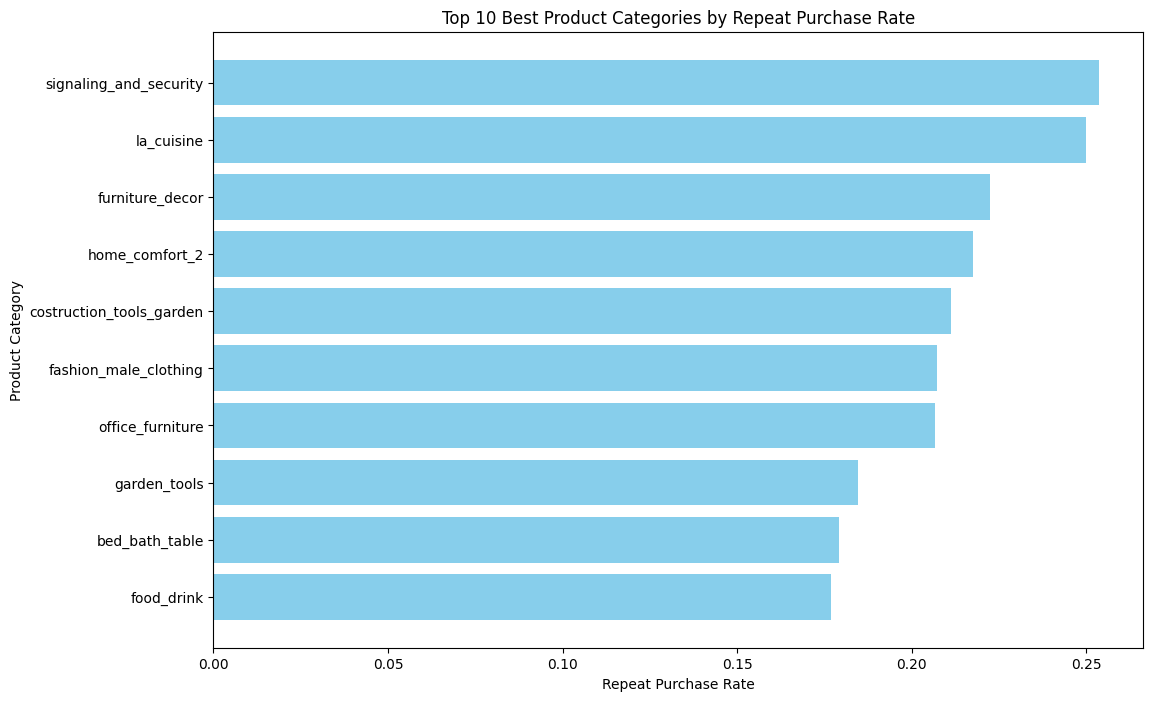

In [35]:
top_10_repeat_purchase_rate = repeat_purchase_rate.head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_repeat_purchase_rate['product_category_name_english'], top_10_repeat_purchase_rate['repeat_purchase_rate'], color='skyblue')
plt.xlabel('Repeat Purchase Rate')
plt.ylabel('Product Category')
plt.title('Top 10 Best Product Categories by Repeat Purchase Rate')
plt.gca().invert_yaxis()  
plt.show()

> Visualisasi Top 10 produk yang memiliki repeat purchase rate tertinggi
- Visualisasi ini dipakai untuk menemukan kategori produk yang memiliki pembelian ulang tertinggi. Data yang dihasilkan akan membantu menentukan strategi untuk meningkatkan tingkat pembelian ulang sebesar 20% dalam 6 bulan ke depan. Dari hasil ini, data menunjukkan bahwa kategori 'sinalizacao_e_seguranca' (sinyal dan keamanan) memiliki tingkat pembelian berulang tertinggi sebesar 25,36%, diikuti oleh 'la_cuisine' (makanan) dan 'pc_gamer' (Komputer) yang masing-masing sebesar 25%, dan 'moveis_decoracao' (Furnitur dan dekorasi) sebesar 22,23%. Kategori-kategori ini memiliki kemungkinan tertinggi bagi pelanggan untuk melakukan pembelian ulang.

- Sebagai insight untuk perusahaan, berfokus pada kategori-kategori ini dapat efektif dalam meningkatkan pembelian berulang sebesar 20% dalam 6 bulan ke depan.


> Rencana Strategi untuk Meningkatkan Repeat Purchase
Berdasarkan hasil analisis, kita bisa merancang strategi untuk meningkatkan repeat purchase rate, seperti:

1. `Memberikan Diskon atau Penawaran Khusus` pada kategori produk dengan repeat purchase rate yang tinggi untuk menarik lebih banyak pelanggan melakukan pembelian ulang.
2. Menyediakan `Program Loyalitas` atau `poin reward khusus` untuk kategori produk tersebut agar pelanggan merasa lebih terdorong untuk berbelanja lagi.
3. `Mempromosikan Produk Berdasarkan Musim` atau `Kebutuhan Pelanggan` dengan memperhatikan tren bulanan atau musiman untuk setiap kategori.

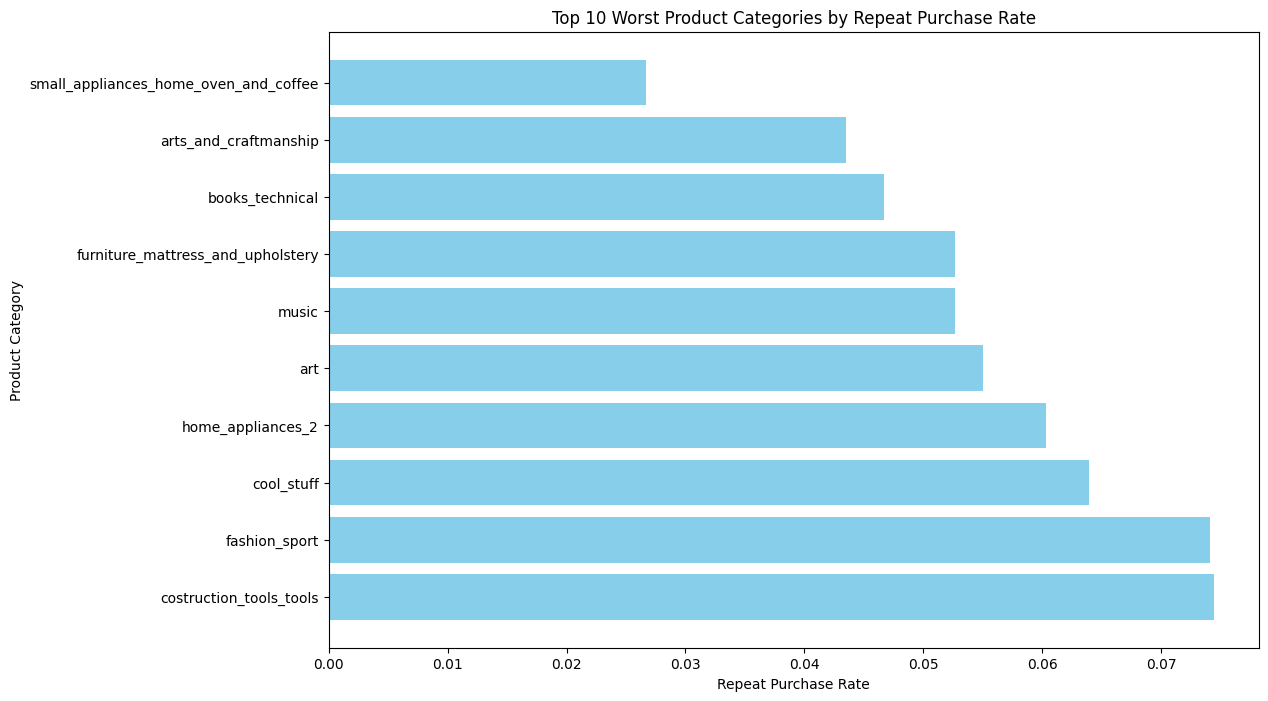

In [36]:
top_10_worst_repeat_purchase_rate = repeat_purchase_rate.tail(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_worst_repeat_purchase_rate['product_category_name_english'], top_10_worst_repeat_purchase_rate['repeat_purchase_rate'], color='skyblue')
plt.xlabel('Repeat Purchase Rate')
plt.ylabel('Product Category')
plt.title('Top 10 Worst Product Categories by Repeat Purchase Rate')
plt.gca()  
plt.show()

> Visualisasi Top 10 produk yang memiliki repeat purchase rate terendah
- Sebaliknya, visualisasi ini dipakai untuk menemukan kategori produk yang memiliki pembelian ulang terendah. 
- Data ini juga bisa memberikan insight untuk perusahaan agar bisa mengevaluasi penyebab utama pembelian ulang yang rendah dan menerapkan strategi perbaikan yang tepat, bisnis dapat meningkatkan loyalitas pelanggan, memperpanjang siklus hidup pelanggan, dan mengoptimalkan profitabilitas.

### Pertanyaan 2: Apa saja faktor utama yang mendorong kepuasan pelanggan (diukur berdasarkan review score), dan bagaimana kita dapat meningkatkannya pada kuartal berikutnya?

In [37]:
# Mengubah tipe data kolom tanggal menjadi datetime
merge_df['order_delivered_customer_date'] = pd.to_datetime(merge_df['order_delivered_customer_date'])
merge_df['order_purchase_timestamp'] = pd.to_datetime(merge_df['order_purchase_timestamp'])

# Menghitung lama pengiriman dalam satuan hari
merge_df['delivery_time_days'] = (merge_df['order_delivered_customer_date'] - merge_df['order_purchase_timestamp']).dt.days

print(merge_df['delivery_time_days'])

0         8
1         8
2         8
3         2
4         5
         ..
115604    3
115605    5
115606    4
115607    3
115608    3
Name: delivery_time_days, Length: 115609, dtype: int64


> Mengambil delivery_time_days untuk melakukan analisa review score
- Menggunakan delivery_time_days untuk menganalisis korelasi dengan review_score penting karena waktu pengiriman merupakan faktor utama yang mempengaruhi kepuasan pelanggan. Pelanggan cenderung memberikan skor ulasan yang lebih rendah jika pengiriman terlambat atau memakan waktu lebih lama dari yang diharapkan.
- Analisis ini didasarkan pada data nyata yang sering saya baca di review-review e-commerce bagaimana waktu pengiriman mempengaruhi review score.

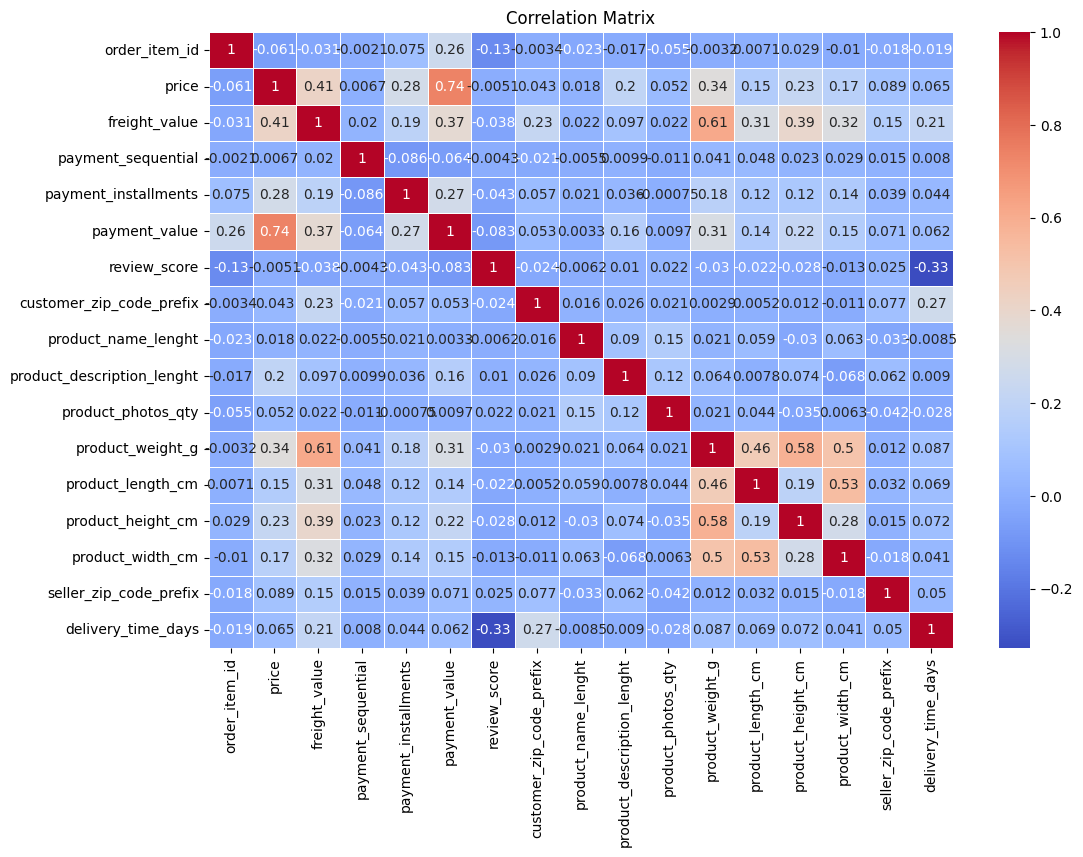

In [38]:
plt.figure(figsize=(12, 8))
correlation_matrix = merge_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

> Correlation Matrix dengan tambahan kolom `delivery_time_days`
- Disini terbukti bahwa `delivery_time_days` memiliki korelasi tertinggi dengan `review_score` dibandingkan dengan kolom lain. Nomor 2 kolom korelasi tertinggi dengan review_score adalah `order_item_id`, mudah dipahami juga karena setiap jenis item memiliki standar review masing-masing yang berbeda. (Contoh: Barang asuransi memiliki rata-rata review_score lebih rendah dari makanan)

In [39]:
correlation_delivery_time = merge_df['review_score'].corr(merge_df['delivery_time_days'])
print(f"Correlation between review scores and delivery time: {correlation_delivery_time}")

Correlation between review scores and delivery time: -0.32810705009375235


Menghitung korelasi antara skor ulasan pelanggan (review_score) dan waktu pengiriman (delivery_time_days) untuk memahami bagaimana waktu pengiriman mempengaruhi kepuasan pelanggan

In [40]:
merge_df['delivery_time_days'].describe()

count    115609.000000
mean         12.244176
std           9.580242
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         208.000000
Name: delivery_time_days, dtype: float64

> Menganalisis apakah ada outliers dalam `delivery_time_days`
- Ternyata ada outliers karena ada perbedaan yang signifikan antara 75% dengan data maksimalnya

In [41]:
print(merge_df['delivery_time_days'].describe())

# Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = merge_df['delivery_time_days'].quantile(0.25)
Q3 = merge_df['delivery_time_days'].quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
merge_df = merge_df[(merge_df['delivery_time_days'] >= lower_bound) & (merge_df['delivery_time_days'] <= upper_bound)]

# Menampilkan hasil setelah menghapus outliers
print(merge_df['delivery_time_days'].describe())
print(f"Correlation between review scores and delivery time: {merge_df['review_score'].corr(merge_df['delivery_time_days'])}")

count    115609.000000
mean         12.244176
std           9.580242
min           0.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         208.000000
Name: delivery_time_days, dtype: float64
count    109376.000000
mean         10.676611
std           6.144954
min           0.000000
25%           6.000000
50%           9.000000
75%          14.000000
max          28.000000
Name: delivery_time_days, dtype: float64
Correlation between review scores and delivery time: -0.1934108414021182


> Menggunakan IQR methods untuk meminimalisir terjadinya outliers

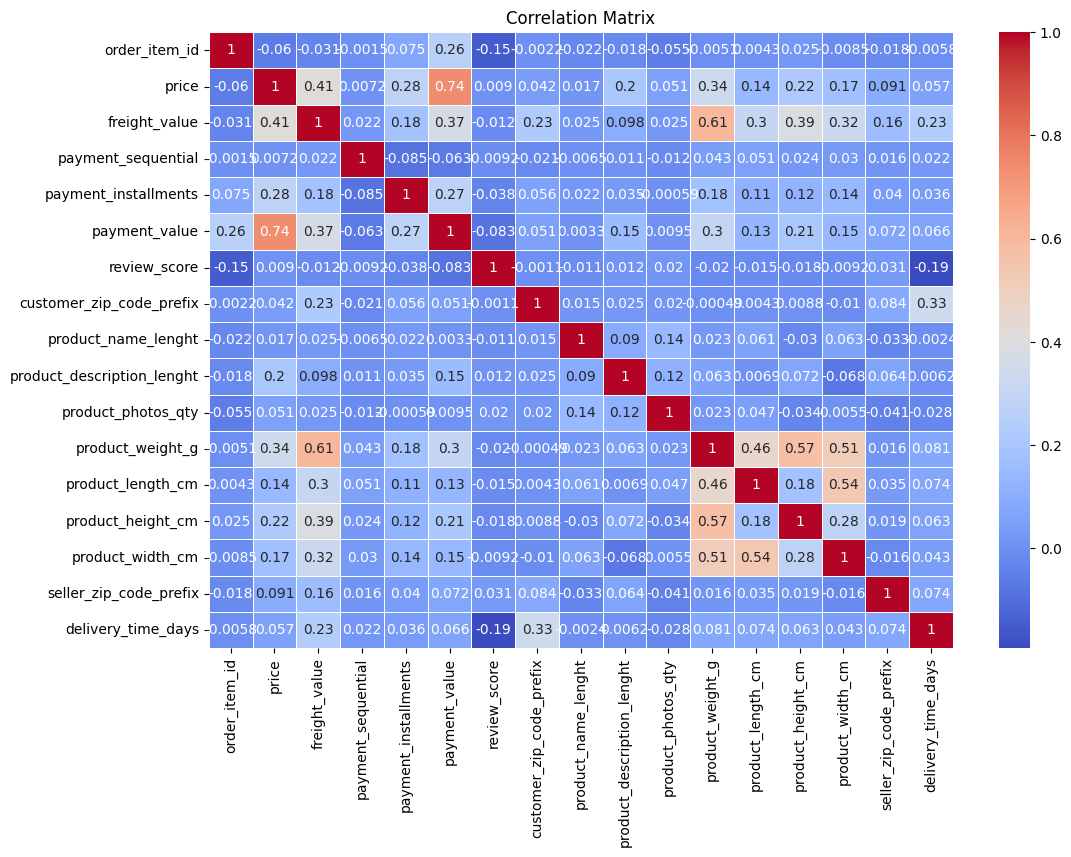

In [42]:
plt.figure(figsize=(12, 8))
correlation_matrix = merge_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

> Melakukan pengecekan ulang correlation matrix pada review_score
- Korelasi review_score - delivery_time_days lebih mendekati 0 dari -0.32 menjadi -0.17, tetapi masih menjadi korelasi yang tertinggi

  Payment Type  Average Review Score
0       boleto              4.127267
1  credit_card              4.138611
2   debit_card              4.234483
3      voucher              4.090104


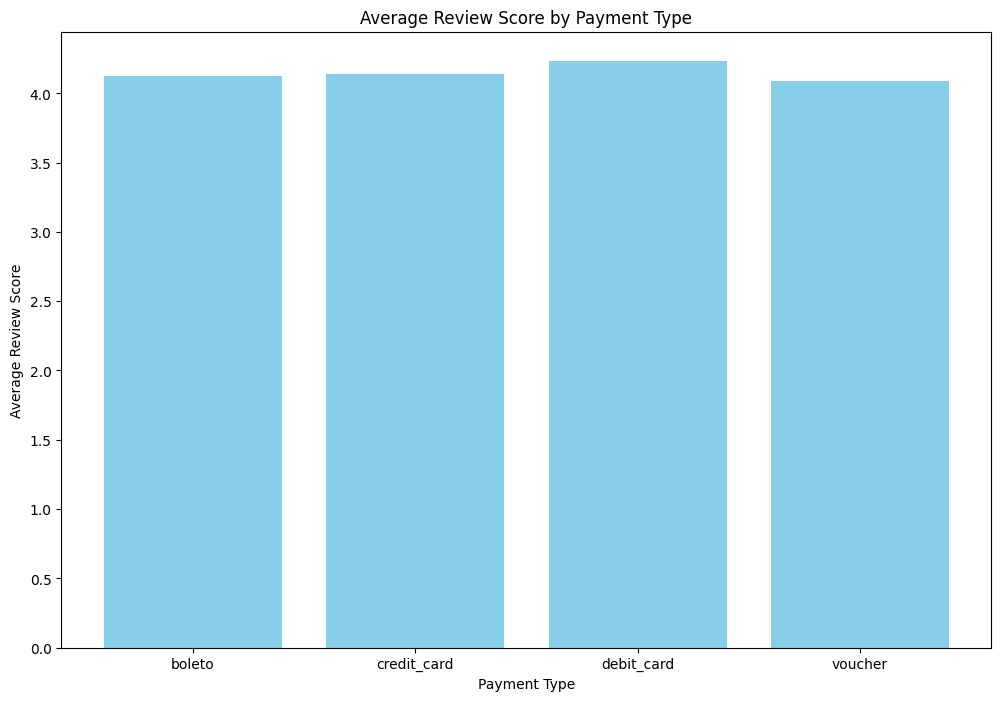

In [43]:
average_review_score_payment = merge_df.groupby('payment_type')['review_score'].mean().reset_index()
average_review_score_payment.columns = ['Payment Type', 'Average Review Score']
print(average_review_score_payment)

plt.figure(figsize=(12, 8))
plt.bar(average_review_score_payment['Payment Type'], average_review_score_payment['Average Review Score'], color='skyblue')
plt.xlabel('Payment Type')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Payment Type')
plt.show()

> Visualisasi tipe payment dengan metric review score
- Debit Card memiliki rata-rata skor ulasan tertinggi (4.23), sedangkan voucher memiliki rata-rata skor ulasan terendah (4.09). Walaupun perbedaan tersebut tidak signifikan, tetapi tetap ada insight yang dapat diambil. Tipe pembayaran dengan skor lebih rendah seperti voucher dapat diidentifikasi sebagai area yang memerlukan evaluasi dan perbaikan untuk meningkatkan pengalaman pelanggan.
- Sebaiknya perusahaan melakukan analisis lebih lanjut pada voucher untuk memahami faktor yang menyebabkan skor ulasan lebih rendah, seperti kemudahan penggunaan, kecepatan transaksi, atau masalah teknis.

In [44]:
# Menghitung rata-rata review score per kategori produk
average_review_score_category = merge_df.groupby('product_category_name_english')['review_score'].mean().reset_index()
average_review_score_category.columns = ['Product Category', 'Average Review Score']

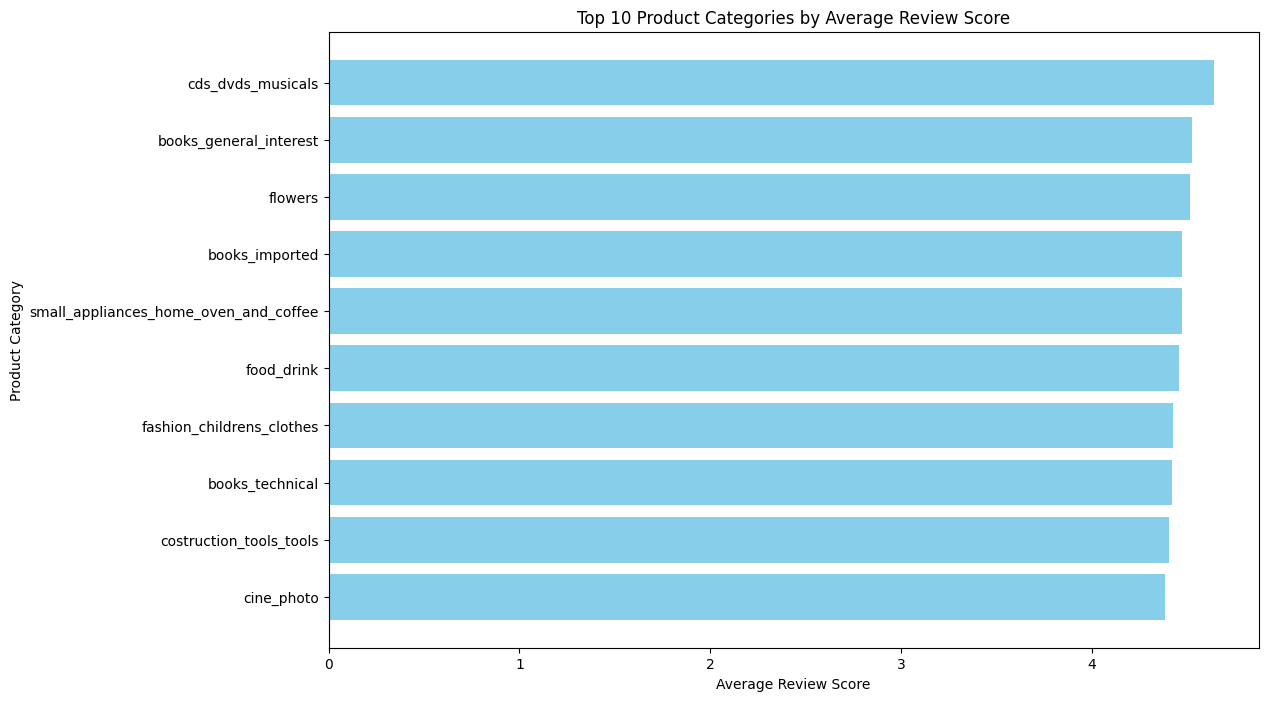

In [45]:
# Sort berdasarkan rata-rata review score
top_10_review_scores_category = average_review_score_category.sort_values(by='Average Review Score', ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_review_scores_category['Product Category'], top_10_review_scores_category['Average Review Score'], color='skyblue')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.title('Top 10 Product Categories by Average Review Score')
plt.gca().invert_yaxis()  
plt.show()

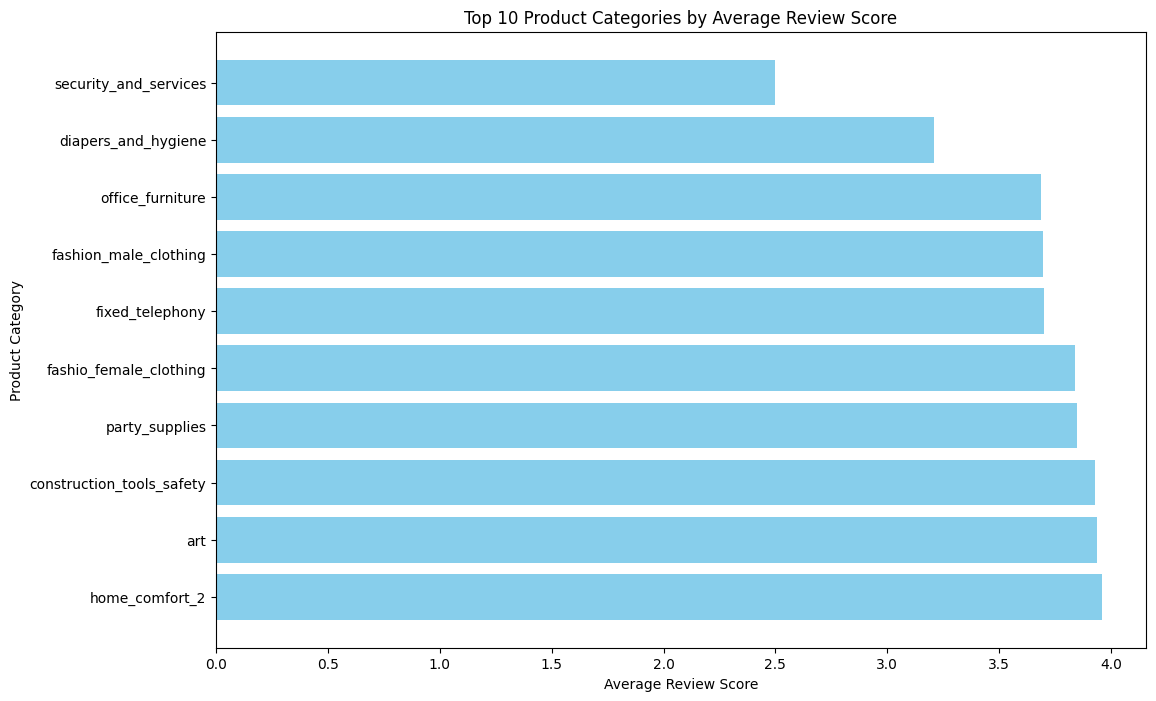

In [46]:
# Sort berdasarkan rata-rata review score
top_10_worst_review_scores_category = average_review_score_category.sort_values(by='Average Review Score', ascending=False).tail(10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_worst_review_scores_category['Product Category'], top_10_worst_review_scores_category['Average Review Score'], color='skyblue')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.title('Top 10 Product Categories by Average Review Score')
plt.gca()  
plt.show()

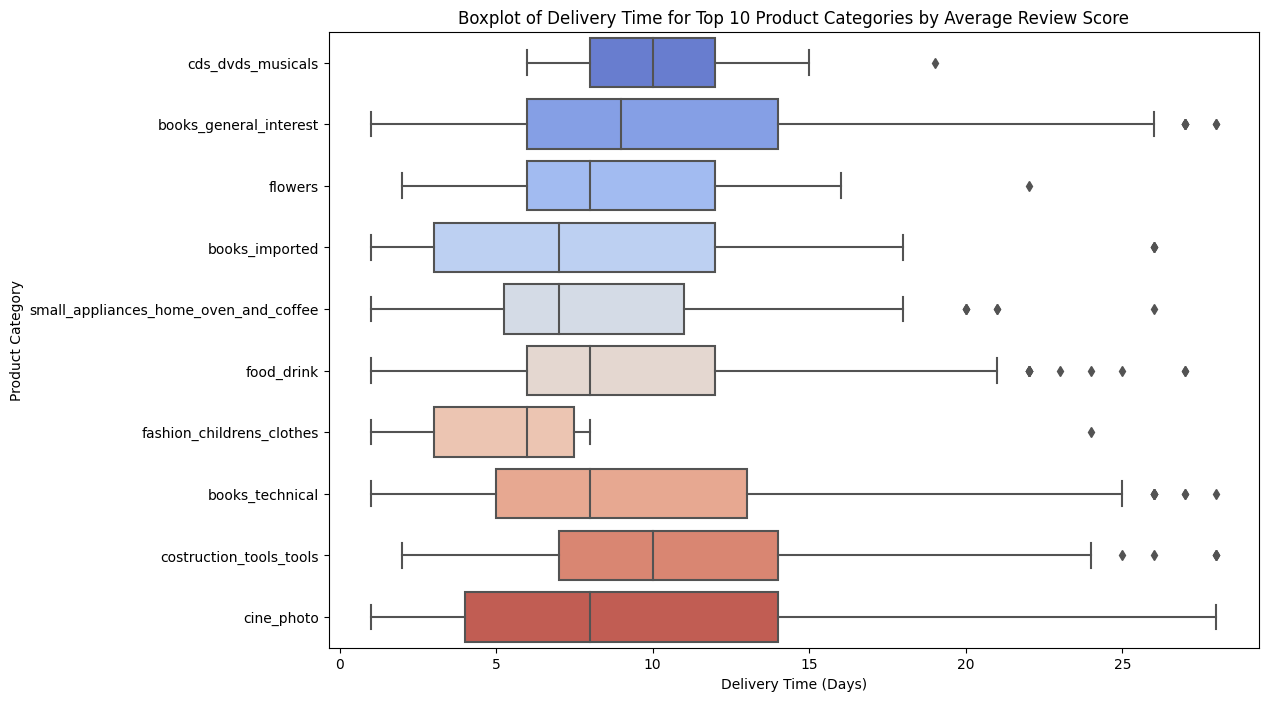

In [47]:
# Filter data berdasarkan top 10 kategori produk dengan rata-rata review score tertinggi
top_10_categories = top_10_review_scores_category['Product Category'].tolist()
filtered_df = merge_df[merge_df['product_category_name_english'].isin(top_10_categories)]

# Boxplot delivery time per kategori produk
plt.figure(figsize=(12, 8))
sns.boxplot(x='delivery_time_days', y='product_category_name_english', data=filtered_df, order=top_10_categories, palette='coolwarm')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Product Category')
plt.title('Boxplot of Delivery Time for Top 10 Product Categories by Average Review Score')
plt.show()

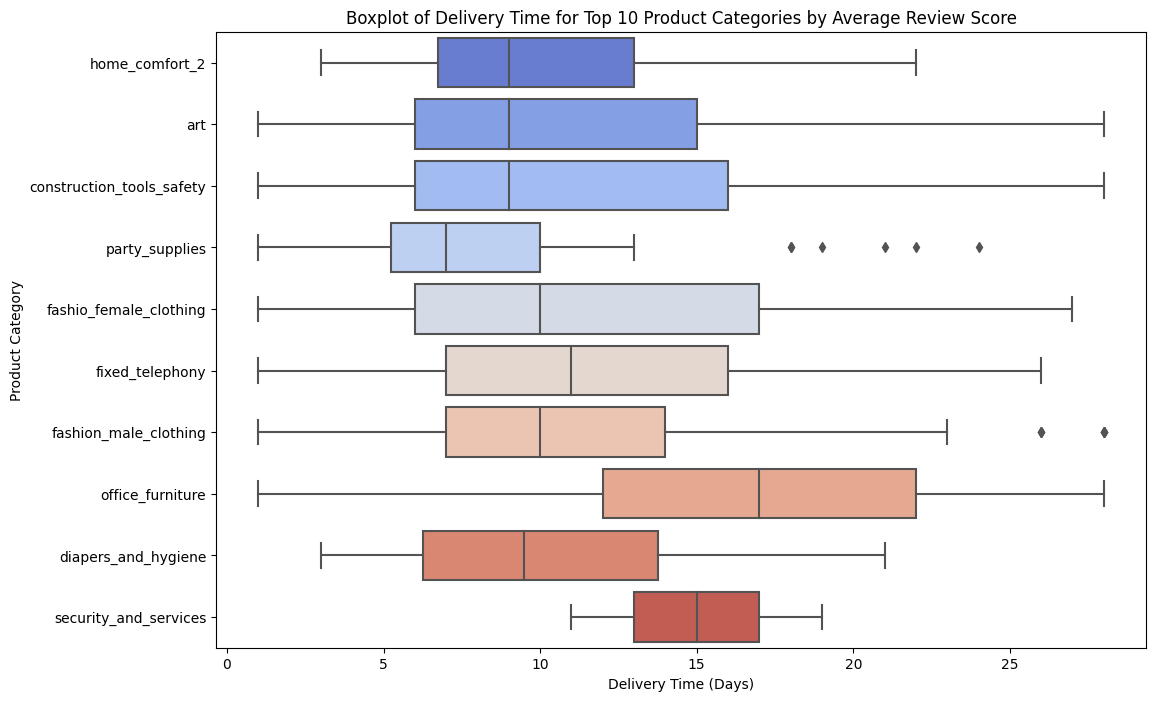

In [48]:
top_10_categories = top_10_worst_review_scores_category['Product Category'].tolist()
filtered_df = merge_df[merge_df['product_category_name_english'].isin(top_10_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='delivery_time_days', y='product_category_name_english', data=filtered_df, order=top_10_categories, palette='coolwarm')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Product Category')
plt.title('Boxplot of Delivery Time for Top 10 Product Categories by Average Review Score')
plt.show()

In [54]:
# Hitung rata-rata delivery time, price, dan freight value untuk produk-produk dengan review score terbaik
best_products = merge_df[merge_df['product_category_name_english'].isin(top_10_review_scores_category['Product Category'])]
worst_products = merge_df[merge_df['product_category_name_english'].isin(top_10_worst_review_scores_category['Product Category'])]

# bp = best product
bp__mean_delivery = best_products['delivery_time_days'].mean()
bp_mean_price = best_products['price'].mean()
bp_mean_freight = best_products['freight_value'].mean()


# wp = worst product
wp_mean_delivery = worst_products['delivery_time_days'].mean()
wp_mean_price = worst_products['price'].mean()
wp_mean_freight = worst_products['freight_value'].mean()

print("mean delivery time for best products: ", bp__mean_delivery)
print("mean price for best products: ", bp_mean_price)
print("mean freight for best products: ", bp_mean_freight)
print("mean delivery time for worst products: ", wp_mean_delivery)
print("mean price for worst products: ", wp_mean_price)
print("mean freight for worst products: ", wp_mean_freight)

mean delivery time for best products:  9.815308988764045
mean price for best products:  108.16948033707865
mean freight for best products:  17.395280898876404
mean delivery time for worst products:  14.470660648338121
mean price for worst products:  158.5598604842019
mean freight for worst products:  30.327349199835865


> Kesimpulan:

- Best product / worst product diukur dari rata-rata review_score
1. Waktu pengiriman best product lebih cepat dibandingkan worst product 
2. Harga pengiriman best product lebih rendah dibandingkan worst product
3. Harga best product lebih murah daripada worst product. Harga yang tinggi tidak selalu berarti produk lebih berisiko mendapatkan ulasan buruk. Namun, ada korelasi antara harga dan ekspektasi kualitas. Ketika pelanggan membeli produk mahal, ekspektasi mereka terhadap kualitas pengiriman, termasuk waktu dan biaya, menjadi lebih tinggi. Jika kedua aspek ini tidak dikelola dengan baik, pelanggan cenderung memberikan ulasan yang lebih rendah dibandingkan produk berharga murah, meskipun waktu dan biaya pengiriman sama.

> Rekomendasi:
1. Fokus pada optimisasi operasional dengan produk harga yang lebih mahal. Fokus ini dapat memberikan keunggulan yang lebih kompetitif pada market dan produk tersebut.
2. Menyesuaikan harga dengan strategi penetapan harga yang lebih efektif menyesuaikan dengan segmen pasar yang lebih luas
3. Mempercepat proses pengiriman sehingga dapat meningkatkan kepuasan pelanggan dan performa produk.

## Analisis Lanjutan (Opsional)

In [55]:
repeat_purchases = merge_df.groupby(['customer_id', 'product_category_name_english']).size().reset_index(name='purchase_count')
repeat_purchases = repeat_purchases[repeat_purchases['purchase_count'] > 1]
repeat_purchases = repeat_purchases.sort_values(by='purchase_count', ascending=False)

# Melakukan RFM untuk customer yang melakukan repeat purchase
# Menghitung Frekuensi pembelian
rfm_df = repeat_purchases.groupby('customer_id')['purchase_count'].sum().reset_index()
rfm_df.columns = ['customer_id', 'Frequency']

# Mengklasifikasi customer berdasarkan frekuensi pembelian
rfm_df['Class'] = pd.cut(rfm_df['Frequency'], bins=[0, 3, 8, 20, rfm_df['Frequency'].max()], labels=['Class1', 'Class2', 'Class3', 'class4'])

print(rfm_df.sort_values(by='Frequency', ascending=False))

# Menghitung jumlah customer di setiap kelas
class_counts = rfm_df['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

print(class_counts)

                            customer_id  Frequency   Class
1817   270c23a11d024a44c896d1894b261a83         63  class4
917    13aa59158da63ba0e93ec6ac2c07aacb         38  class4
7041   9af2372a1e49340278e7c1ef8d749f34         29  class4
6682   92cd3ec6e2d643d4ebd0e3d6238f69e2         26  class4
4502   63b964e79dee32a3587651701a2b8dbf         24  class4
...                                 ...        ...     ...
4393   615083329aca47787c68a44be804d3e1          2  Class1
4395   615524b12e97c076f052c4fe166ecce2          2  Class1
4396   6156cc24d1fb47ea3976b55ed489de3c          2  Class1
4397   615d41b291075c1c126f20c616625a12          2  Class1
11503  ffffa3172527f765de70084a7e53aae8          2  Class1

[11504 rows x 3 columns]
    Class  Count
0  Class1  10103
1  Class2   1311
2  Class3     76
3  class4     14


> RFM Analisis mengenai customer yang melakukan repeat purchase pada suatu produk

1. Class 4 (Customer Dengan Loyalty tertinggi pada suatu produk -> Purchasing `20 - 63 kali`, walaupun customer yang melakukan purchase 63 kali adalah outlier):
- customer yang sangat loyal dengan suatu produk yang terus-menerus mereka beli. Loyalty ini sangat langka.
- Rekoemndasi: Program loyalitas eksklusif seperti akses awal ke produk baru, hadiah khusus, dan lain-lain. Selain itu, harus diberikan personalisasi khusus pada produk tersebut oleh customer class 4.

2.  Class3 (Frekuensi repeat purchase tinggi -> purchasing `8 - 63 kali` berdasarkan data, tetapi rata-rata purchase 8-20 kali. Customer yang melakukan purchase  kali adalah outlier):
- customer yang sering berbelanja cenderung lebih puas dengan pengalaman mereka, mungkin karena loyalitas yang lebih tinggi dan kepercayaan terhadap produk serta layanan.
- Rekomendasi: Implementasikan program loyalitas untuk mempertahankan dan meningkatkan kepuasan customer. Selain itu, minta feedback lebih mendalam untuk terus meningkatkan kualitas produk dan layanan.

3. Class2 (Frekuensi repeat purchase menengah -> purchasing `4-7` kali):
- customer dengan frekuensi pembelian menengah memiliki tingkat kepuasan yang dapat ditingkatkan melalui program loyalitas atau peningkatan kualitas layanan.
- Rekomendasi: Tawaran promosi khusus atau insentif untuk meningkatkan frekuensi pembelian.

4. Class1 (Frekuensi repeat purchase rendah -> purchasing `1-3` kali):
- customer yang jarang berbelanja mungkin memiliki pengalaman yang kurang memuaskan atau kebutuhan yang kurang terpenuhi. Fokus pada peningkatan pengalaman customer dan retensi dapat membantu meningkatkan frekuensi pembelian mereka.
- Rekomendasi: Mengimpelementasikan strategi retensi seperti meningkatkan kualitas layanan pelanggan atau menawarkan diskon pertama kali. Selain itu, meningkatkan juga engangement melalui advertisement yang lebih personal dan relevan

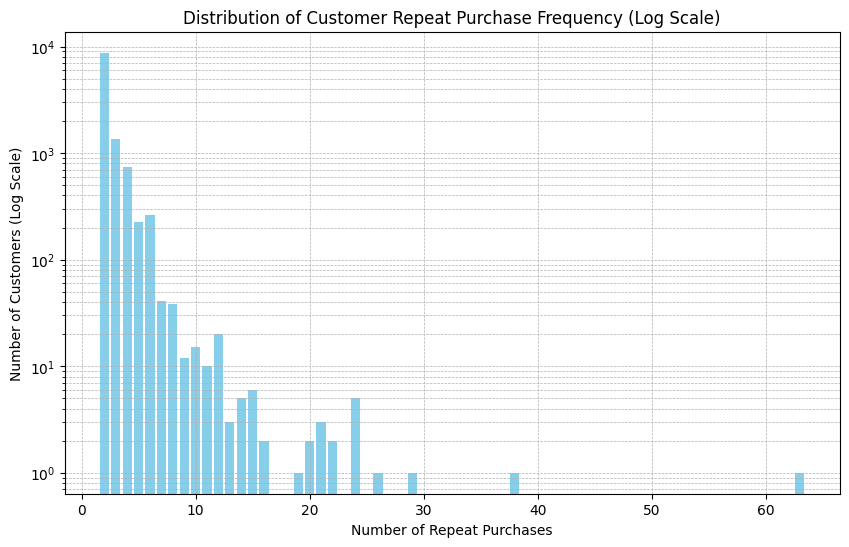

In [56]:
frequency_counts = rfm_df['Frequency'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(frequency_counts.index, frequency_counts.values, color='skyblue')
plt.yscale('log')  # Logarithmic Scale
plt.xlabel('Number of Repeat Purchases')
plt.ylabel('Number of Customers (Log Scale)')
plt.title('Distribution of Customer Repeat Purchase Frequency (Log Scale)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

> Visualisasi distribusi jumlah customer vs repeat purchases

## Conclusion

- Conclution pertanyaan 1:<br>


> Berdasarkan analisis repeat purchase pada kategori produk, terlihat bahwa kategori dengan repeat purchase tertinggi adalah sinalizacao_e_seguranca (sinyal dan keamanan) dengan rate 25,36%, diikuti oleh kategori la_cuisine (makanan) dan pc_gamer (komputer) yang masing-masing memiliki repeat purchase sebesar 25%, serta moveis_decoracao (furnitur dan dekorasi) dengan rate 22,23%. Kategori-kategori ini menunjukkan potensi tinggi bagi perusahaan untuk meningkatkan loyalitas customer, karena repeat purchase mencerminkan kepuasan dan minat konsumen yang berkelanjutan terhadap produk tersebut.<br>

> Strategi untuk Meningkatkan repeat purchase sebesar 20% dalam 6 Bulan ke Depan

- Untuk mencapai peningkatan 20% dalam repeat purchase pada kategori-kategori tersebut, beberapa strategi yang dapat diterapkan adalah:

1. `Diskon dan Penawaran Khusus` dengan menawarkan diskon eksklusif atau penawaran khusus pada produk di kategori dengan repeat purchase tinggi, seperti sinyal dan keamanan, komputer, dan furnitur. Diskon ini akan meningkatkan daya tarik dan mendorong customer untuk melakukan repeat purchase.

2. `Program Loyalitas dan Poin Reward` untuk menyediakan program loyalitas yang memberikan poin atau reward khusus saat customer membeli produk dalam kategori tertentu. Insentif ini dapat membuat customer lebih terdorong untuk membeli ulang produk di kategori yang sama karena mereka mendapatkan nilai tambahan atau hadiah.

3. `Promosi Berdasarkan Tren dan Musiman` untuk melihat perubahan tren dari kategori populer, seperti moveis_decoracao yang sempat menjadi produk teratas di periode awal, perusahaan dapat melakukan promosi yang selaras dengan tren musiman atau kebutuhan bulanan customer. Kampanye yang relevan dan tepat waktu akan meningkatkan repeat purchase.

> Strategi Evaluasi Kategori dengan repeat purchase Rendah

- Kategori dengan repeat purchase rendah juga perlu dianalisis lebih lanjut untuk memahami penyebabnya. Beberapa kemungkinan penyebab rendahnya repeat purchase mungkin mencakup kualitas produk, ketidakcocokan dengan kebutuhan konsumen, atau kurangnya strategi promosi yang efektif. Perusahaan dapat mempertimbangkan:

1. `Mengumpulkan feedback dari customer` pada produk dengan repeat purchase rendah untuk memperbaiki kualitas atau fitur produk.
2. Menggunakan data ini untuk `memperbaiki strategi pemasaran`, memastikan produk ini lebih menonjol dalam kampanye promosi atau lebih cocok dengan profil kebutuhan customer.

Dengan berfokus pada kategori produk yang memiliki potensi repeat purchase yang tinggi, perusahaan dapat meningkatkan kepuasan dan loyalitas customer. Langkah-langkah ini akan membantu perusahaan memenuhi target peningkatan repeat purchase sebesar 20% dalam 6 bulan ke depan.

- Conclution pertanyaan 2:<br>

> Faktor Utama yang Mempengaruhi Kepuasan Pelanggan:

1. Waktu Pengiriman (delivery_time_days). Waktu pengiriman yang lebih lama berkorelasi dengan skor ulasan yang lebih rendah. Pelanggan cenderung memberikan skor yang lebih tinggi ketika pengiriman cepat.
Tipe Pembayaran:

2. Tipe Pembayaran Debit Card. Adanya perbedaan rata-rata skor ulasan tertinggi (4.23), menunjukkan tingkat kepuasan yang lebih baik dibandingkan metode pembayaran lainnya. Voucher Memiliki rata-rata skor ulasan terendah (4.09), meskipun perbedaannya tidak signifikan, menunjukkan potensi area untuk perbaikan.

3. Harga dan Biaya Pengiriman Produk. Produk terbaik dijual dengan harga yang lebih rendah (132.62) dibandingkan produk terburuk (145.58). Produk terbaik memiliki biaya pengiriman yang lebih rendah (17.65) dibandingkan produk terburuk (19.45). `Harga yang lebih tinggi tidak selalu berbanding lurus dengan kepuasan ulasan jika ekspektasi kualitas tidak terpenuhi`.

> Strategi untuk meningkatkan kepuasan customer pada kuartal kedepan:

1. Optimisasi Waktu pengiriman -> Bisa dilakukan dengan memperbaikai proses logistik, meningkatkan efisiensi operasional, kerja sama dengan penyedia logistik yang lebih handal, dan melakukan monitoring rutin berdasarkan data real-time

2. Analisis Mendalam pada Voucher -> Melakukan survei analisis terhadap kendala yang dihadapi customer saat menggunakan voucher, seperti ease of use atau technical problemnya.

3. Transparansi harga dan biaya pengiriman untuk mengurangi potensi review_score yang rendah, transparansi waktu pengiriman yang tepat agar ekspektasi customer tidak terpecahkan.

4. Adanya program loyalitas eksklusif untuk customer loyal (Customer Class 2, 3, 4) untuk menawarkan diskon eksklusif agar bisa meningkatkan kualitas review score.

5. Peningkatan kualitas produk dan layanan dengan feedback ebrkala agar produk dan customer bisa saling memahami supply & demand yang mereka miliki.

In [57]:
merge_df.to_csv('./dashboard/merge_df.csv', index=False)